# Diamon Porject

### In this notebook we will analysis and make visualization and explanation about the dataset and a train  out data on a lot of models and finte tuning the best model get the results.


##### Import Required Libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


### Reading Data

In this notebook  we will work on all train dataset and test dataset without split the train dataset to train and test.

In [2]:
def read_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
train_data = read_data('train.csv')
test_data = read_data('test.csv')
train_data.head(10)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
5,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87
6,7,0.71,Very Good,F,VS1,61.8,60.0,3017,5.66,5.70,3.51
7,8,0.70,Ideal,F,SI1,61.3,57.0,2288,5.72,5.77,3.52
8,9,0.59,Ideal,D,VS1,60.9,56.0,2175,5.39,5.44,3.30
9,10,0.31,Very Good,G,VVS1,59.8,62.0,761,4.35,4.41,2.62


## A- Data discovery

####  Get a quick description of the data

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


First thing we will note that there is no null values in our dataset.

Second data  contains categorical value 

Here we will so what is the categorical data 

In [5]:
train_data.cut.value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

In [6]:
train_data.color.value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

In [7]:
train_data.clarity.value_counts()

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

## Let’s look at the summary of the numerical attributes .



In [8]:
train_data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## B- Data visualization

#### Create a hist plot for diamond dataframe 

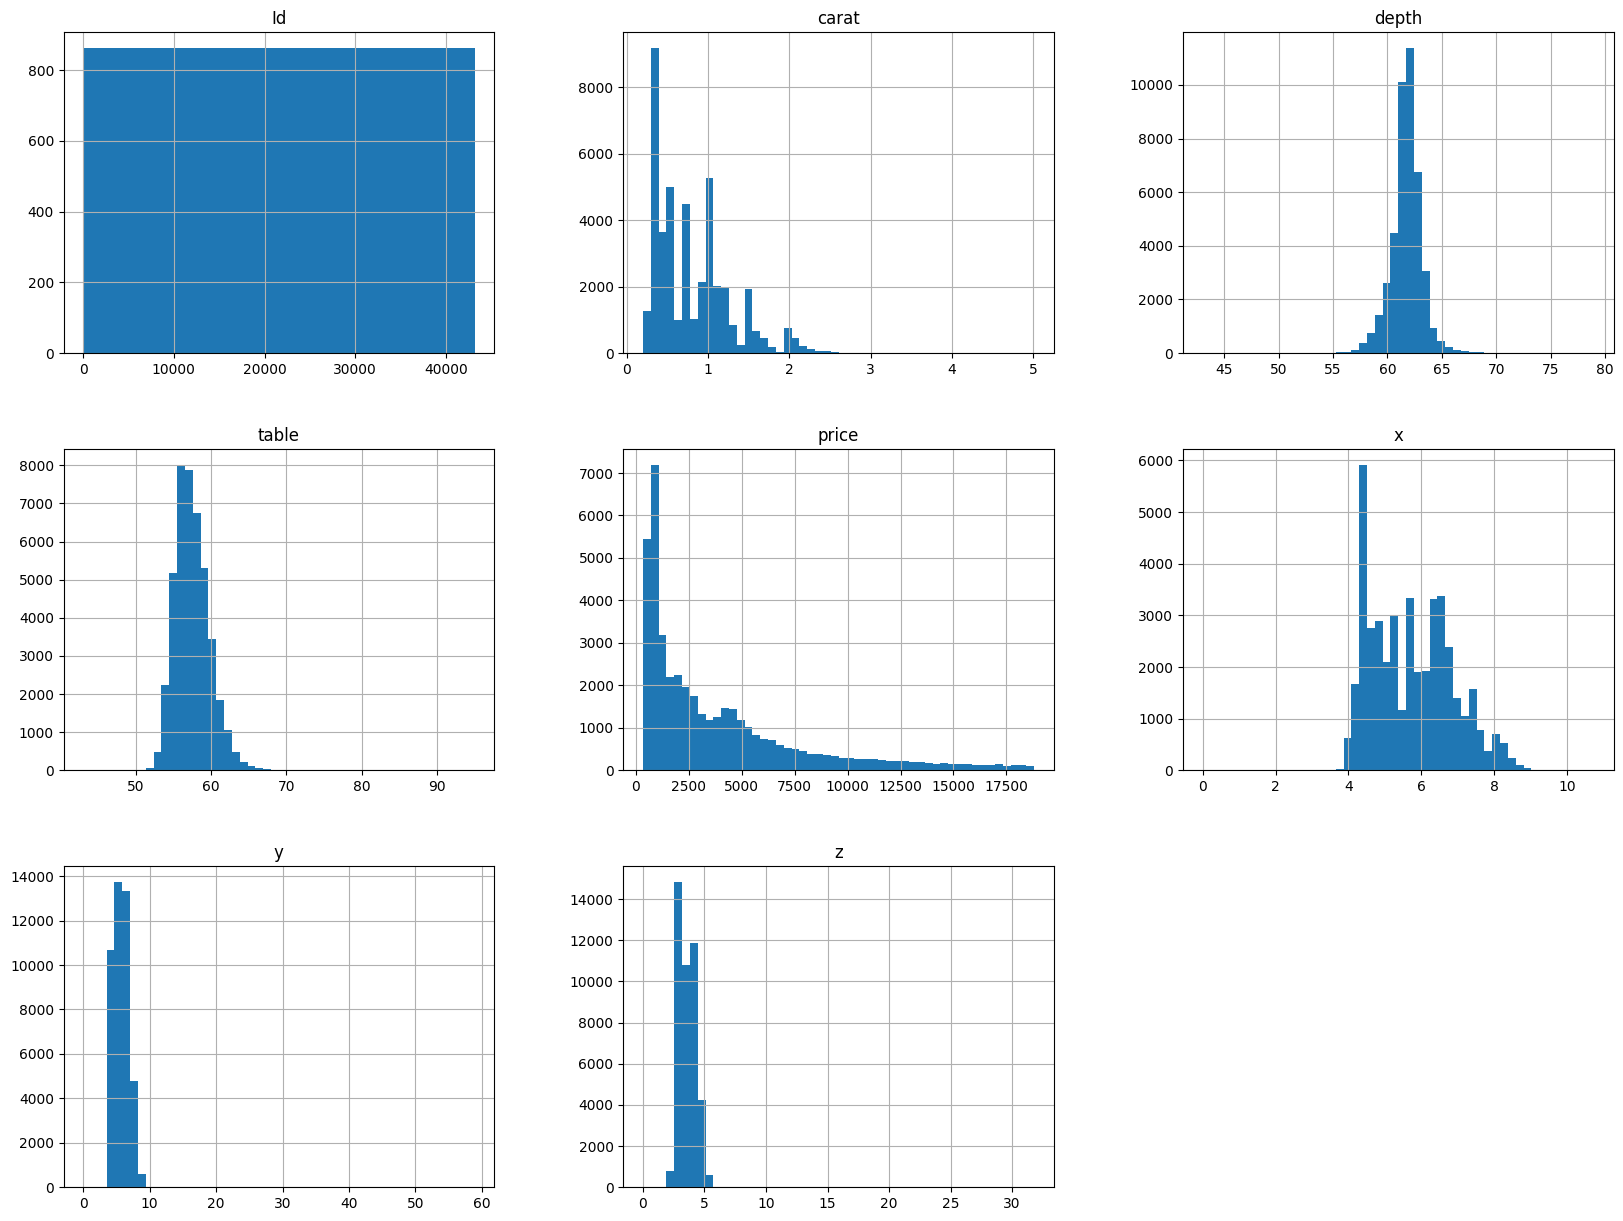

In [9]:
train_data.hist(figsize = (20,15),bins = 50)
plt.show()

#### Show the hist  based on cut

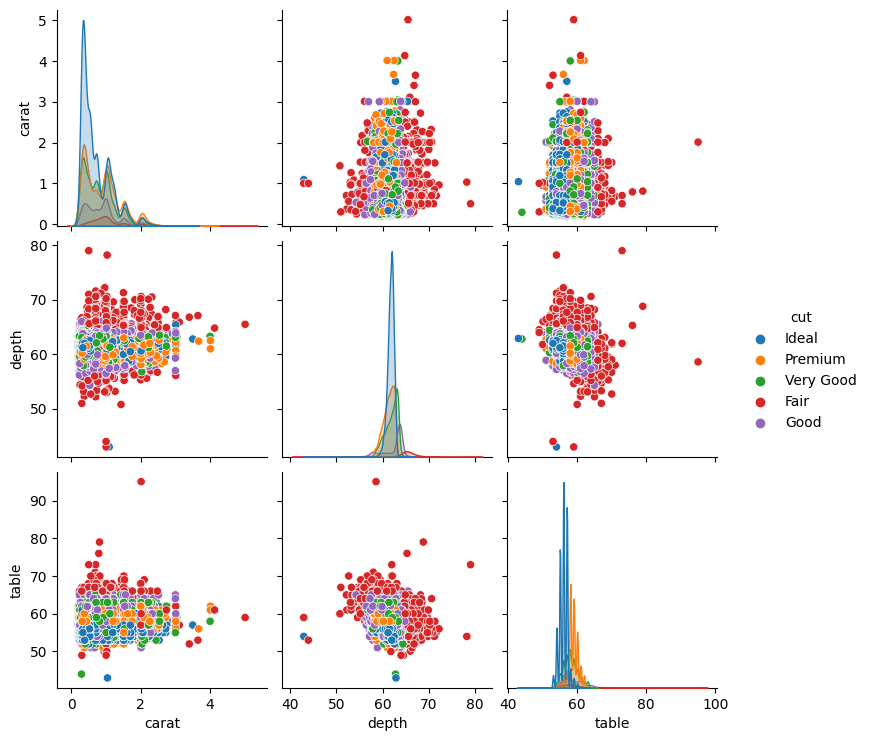

In [10]:
attributes = ["carat", "color", "clarity", "depth", "table", "cut"]
sns.pairplot(train_data[attributes], hue="cut")

<Axes: xlabel='price', ylabel='clarity'>

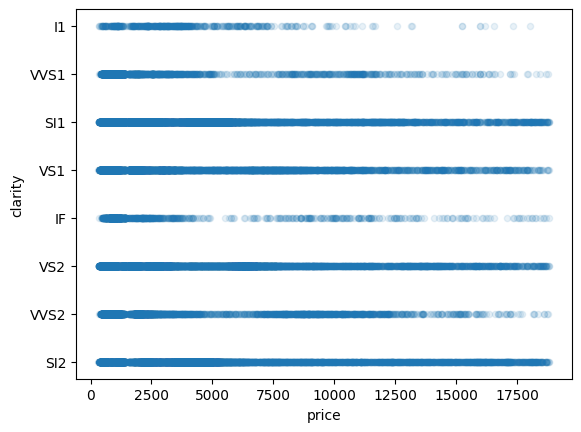

In [11]:
train_data.plot(kind = 'scatter',x='price',y='clarity', alpha=0.1)

<Axes: xlabel='price', ylabel='carat'>

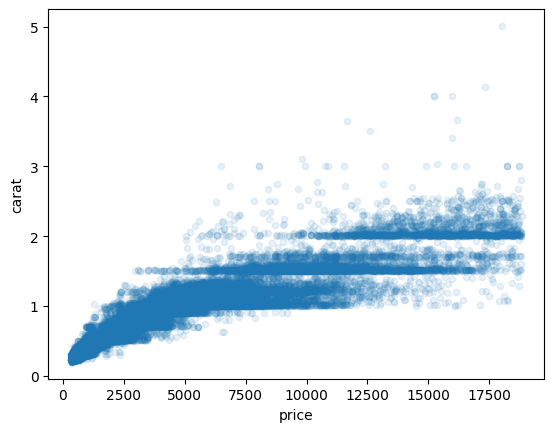

In [12]:
train_data.plot(kind = 'scatter',x='price',y='carat', alpha=0.1)

<Axes: xlabel='price', ylabel='cut'>

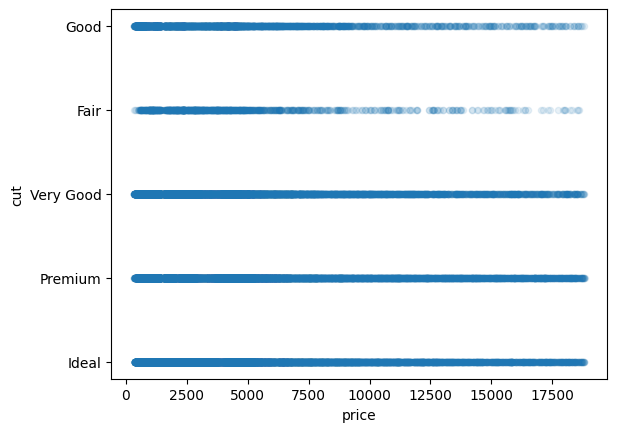

In [13]:
train_data.plot(kind = 'scatter',x='price',y='cut', alpha=0.1)


#### Create a boxplot to show the relation between price and the categorical feature cat




###### Create a boxplot to show the relation between price and the categorical feature clarity





<Axes: xlabel='price', ylabel='clarity'>

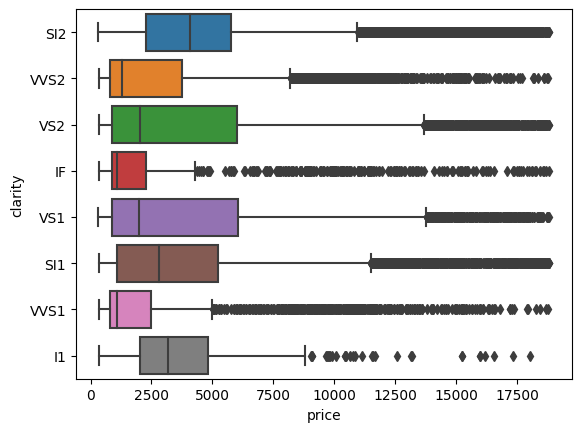

In [14]:
sns.boxplot(data=train_data, x=train_data.price, y=train_data.clarity)


#### Create a boxplot to show the relation between price and the categorical feature color



<Axes: xlabel='price', ylabel='color'>

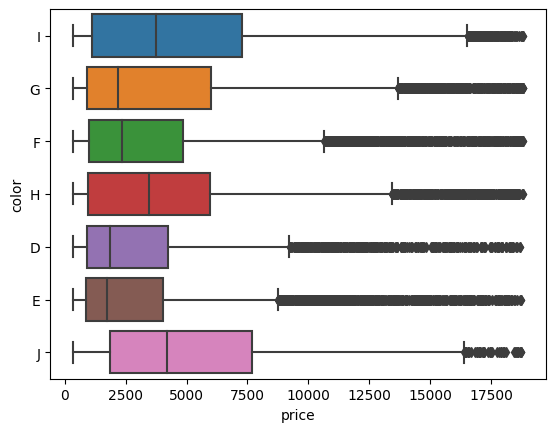

In [15]:
sns.boxplot(data=train_data, x=train_data.price, y=train_data.color)

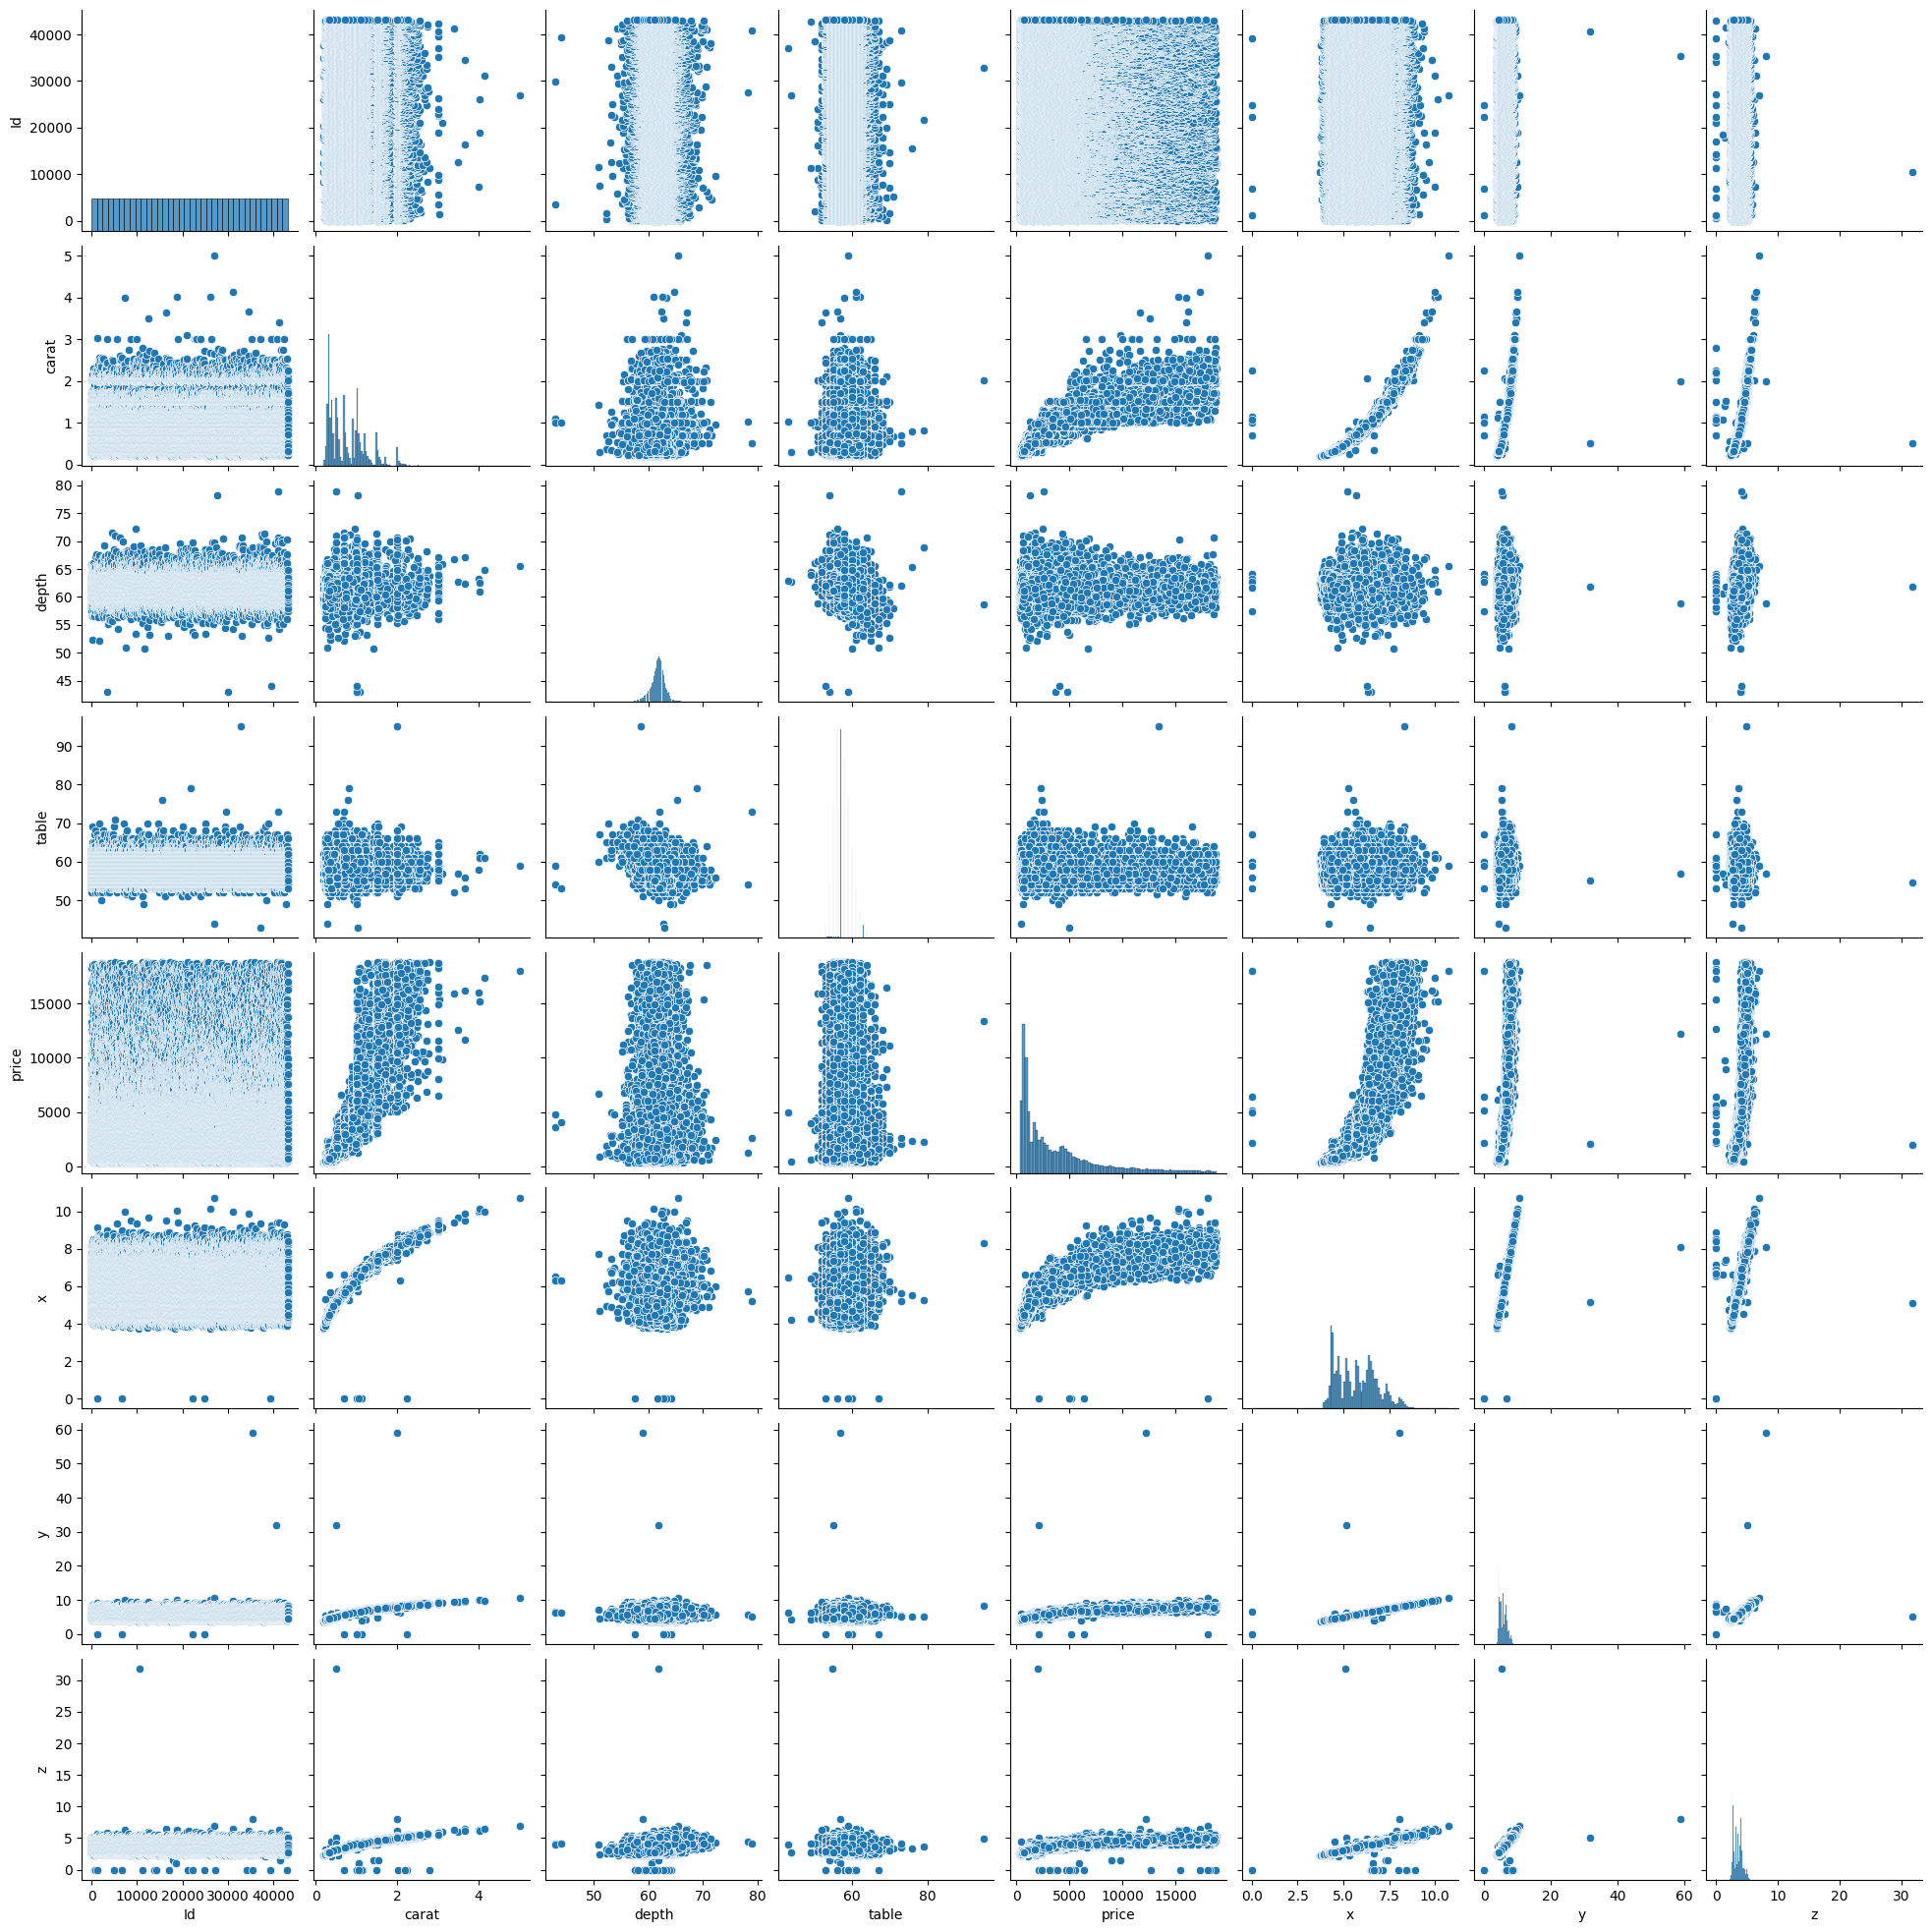

In [16]:
sns.pairplot(train_data)


#### Create a lmplot  to show if we lave linear relation between price and diamond width


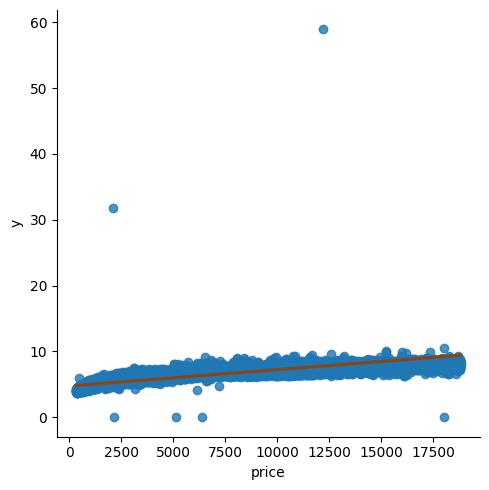

In [17]:
sns.lmplot(x='price',y='y',data=train_data,line_kws={"color": "#8B4513"})


#### Create a lmplot  to show if we lave linear relation between price and diamond length





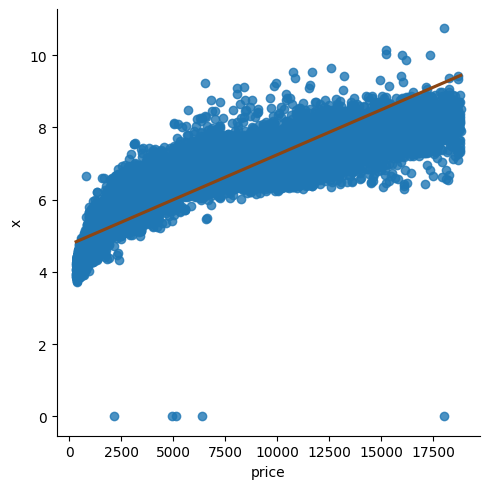

In [18]:
sns.lmplot(x='price',y='x',data=train_data,line_kws={"color": "#8B4513"})


#### Create a lmplot  to show if we lave linear relation between price and diamond depth

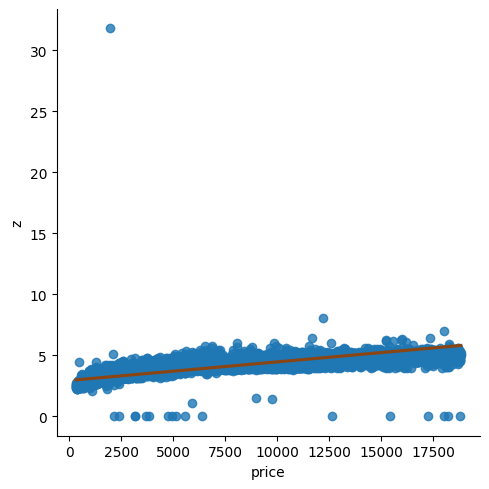

In [21]:
sns.lmplot(x='price',y='z',data=train_data,line_kws={"color": "#8B4513"})

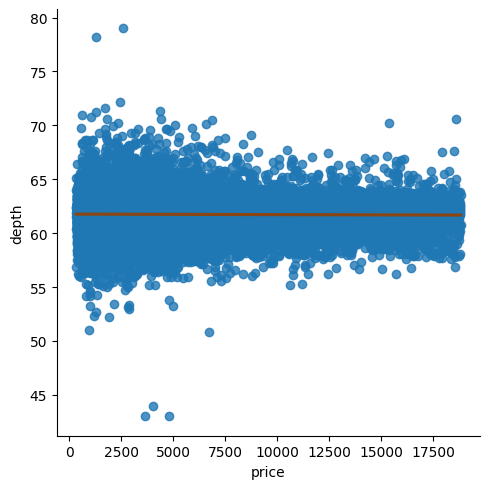

In [22]:
sns.lmplot(x='price',y='depth',data=train_data,line_kws={"color": "#8B4513"})

#### Use heatmap to show the relation clearer among the features


In [23]:
corr_mat = train_data.corr()

<ipython-input-23-855363ad444f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = train_data.corr()


<Axes: >

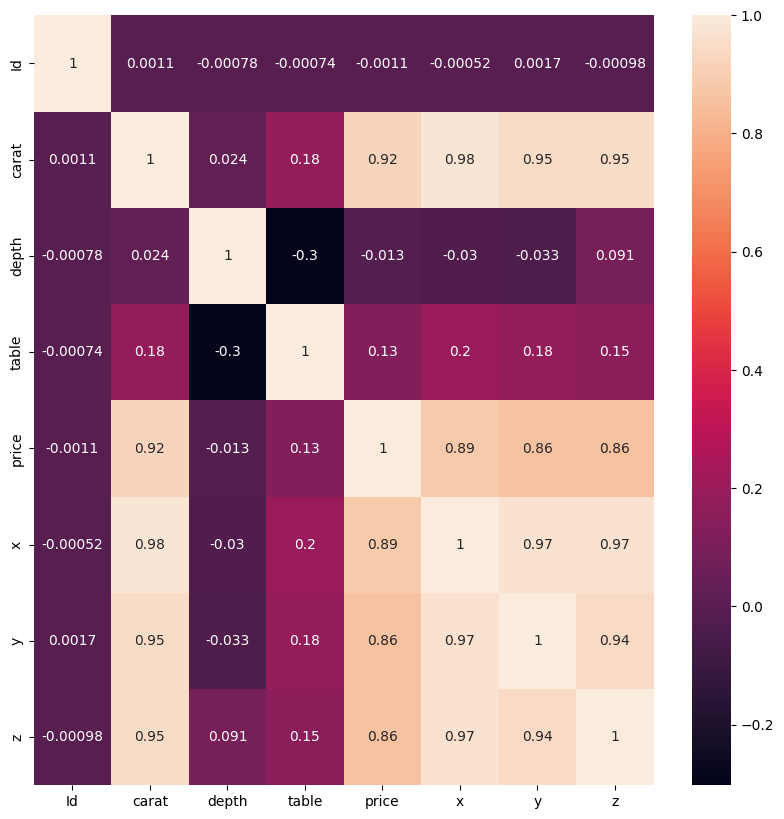

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True)

###### In this step  we will make a new feature called size to see if it has a effect on predicted price

In [25]:
train_data['size'] = train_data.x * train_data.y * train_data.z 
test_data['size'] = test_data.x * test_data.y * test_data.z 

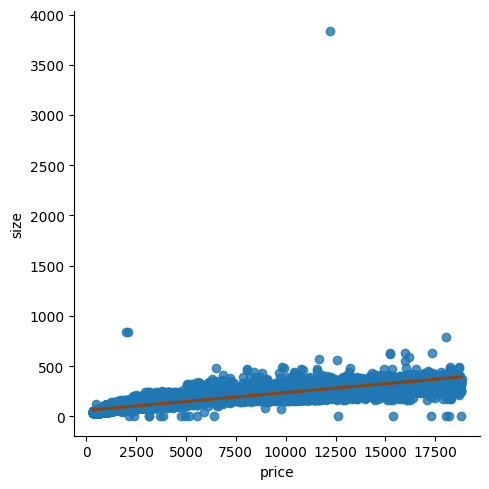

In [26]:
sns.lmplot(x='price',y='size',data=train_data,line_kws={"color": "#8B4513"})

##### After creating a size feature , we will delete  x, y, z features. 

In [27]:
# train_data.drop(['x','y','z'],axis=1,inplace =True)
# test_data.drop(['x','y','z'],axis=1,inplace =True)

##### Here we will replace zeros values in x,y,z with the median values in train and test dataset. 

In [7]:
for i in ['x','y','z']:
  median_size = train_data[i].median()
  train_data[i] = train_data[i].replace(0, median_size)

for i in ['x','y','z']:
  median_size = test_data[i].median()
  test_data[i] = test_data[i].replace(0, median_size)

#### Removing outliers

In [8]:
def remove_outliers(df):
    # Loop over each column of the DataFrame
    for col in df.columns:
        # Calculate the lower and upper bounds for outliers using Tukey's method
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count the number of outliers in the column
        num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        
        # If the percentage of outliers is less than 10%, remove them from the column
        if num_outliers / len(df[col]) < 0.1:
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            
    return df

In [ ]:
train_data = remove_outliers(train_data)

# C- Model Selection and Transformations

#### We will make a  Label encoder to categorical values to perform it to numerical values.

In [9]:
cat_cols = ['color', 'clarity', 'cut']

# Perform label encoding on train data
for col in cat_cols:
    le = LabelEncoder()
    le.fit(train_data[col])
    train_data[col] = le.transform(train_data[col])

# Perform label encoding on test data
for col in cat_cols:
    le = LabelEncoder()
    le.fit(test_data[col])
    test_data[col] = le.transform(test_data[col])

In [10]:
x_train = train_data.drop(['price','z','Id'],axis=1)
x_test = test_data.drop(['z','Id'],axis=1)
y_train = train_data['price']
test_id = test_data['Id']

### In this cell we will create a lot of pipelines with StandrdScalar  and many models. 

In [21]:

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor(colsample_bytree=1.0,
                                         gamma=100,
                                         learning_rate=0.1,
                                         max_depth=10,
                                         min_child_weight=4
                                         , n_estimators=110
                                         , reg_alpha=1.4,
                                         reg_lambda=5,
                                         subsample=1))])

# pipeline_SVR=Pipeline([('scalar7',StandardScaler()),
#                        ('svr',SVR(C=1.0, epsilon=0.2))])

pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [22]:
 pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

In [23]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1346.641902 
Lasso: 1345.872524 
DecisionTree: 756.795543 
RandomForest: 553.991646 
KNeighbors: 824.635292 
XGBRegressor: 526.901776 


### Predict the results with XGBoost model

In [ ]:
xgb_pred = pipeline_xgb.predict(x_test)

#### Create submissions dataframe and saving it as csv. 

In [ ]:
submission = pd.DataFrame({'id': test_id, 'price': xgb_pred})
submission.to_csv('submission.csv',index=None)

#### Using RandomizedSearchCV on XGBoost to select the best parameters 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gamma': [0, 1, 2, 3, 4],
    'min_child_weight': [1, 2, 3, 4, 5],
    'reg_alpha': [0, 0.1, 0.5, 1, 5],
    'reg_lambda': [0, 0.1, 0.5, 1, 5],
}

random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, 
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2)

random_search.fit(x_train, y_train)

print("Best score: ", random_search.best_score_)
print("Best parameters: ", random_search.best_params_)

In [ ]:
xgb = XGBRegressor()
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gamma': [0, 1, 2, 3, 4],
    'min_child_weight': [1, 2, 3, 4, 5],
    'reg_alpha': [0, 0.1, 0.5, 1, 5],
    'reg_lambda': [0, 0.1, 0.5, 1, 5],
}
clf = GridSearchCV(xgb, param_dist, cv=5, n_jobs=-1, verbose=2)

clf.fit(x_train, y_train)

print("Best score: ", clf.best_score_)
print("Best parameters: ", clf.best_params_)

Fitting 5 folds for each of 2250000 candidates, totalling 11250000 fits
